In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns 
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("C:\\Users\\Admin\\Desktop\\Desktop\\Python project\\Exploratory Data Anaylsis on dataset-Terrorism\\Global Terrorism - START data\\globalterrorismdb_0718dist.csv",encoding='ISO-8859-1',low_memory=False)
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
df.shape

(181691, 135)

In [6]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [7]:
df.rename(columns={'provstate':'State','iyear':'Year','imonth':'Month','city':'City','iday':'Day','country_txt':'Country','region_txt':'Region',
                   'attacktype1_txt':'Attack_type','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary',
                   'gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [8]:
df['Casualities'] = df.Killed + df.Wounded

In [9]:
Terror_updated = df[['Year','Month','Day','Country','State','Region','City','latitude','longitude','Attack_type','Killed','Wounded','Target','Summary','Group','Target','Summary','Group','Target_type','Weapon_type','Motive','Casualities']]

In [10]:
Terror_updated.head()

,Year,Month,Day,Country,State,Region,City,latitude,longitude,Attack_type,...,Target,Summary,Group,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualities
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,...,Julio Guzman,NaN,MANO-D,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),...,"Nadine Chaval, daughter",NaN,23rd of September Communist League,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,...,Employee,NaN,Unknown,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,...,U.S. Embassy,NaN,Unknown,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,...,U.S. Consulate,NaN,Unknown,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN


In [11]:
Terror_updated.isna().sum()

Year                0
Month               0
Day                 0
Country             0
State             421
Region              0
City              434
latitude         4556
longitude        4557
Attack_type         0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
Casualities     16874
dtype: int64

In [12]:
Terror_Final = Terror_updated.dropna(axis=0)
Terror_Final.shape

(46556, 22)

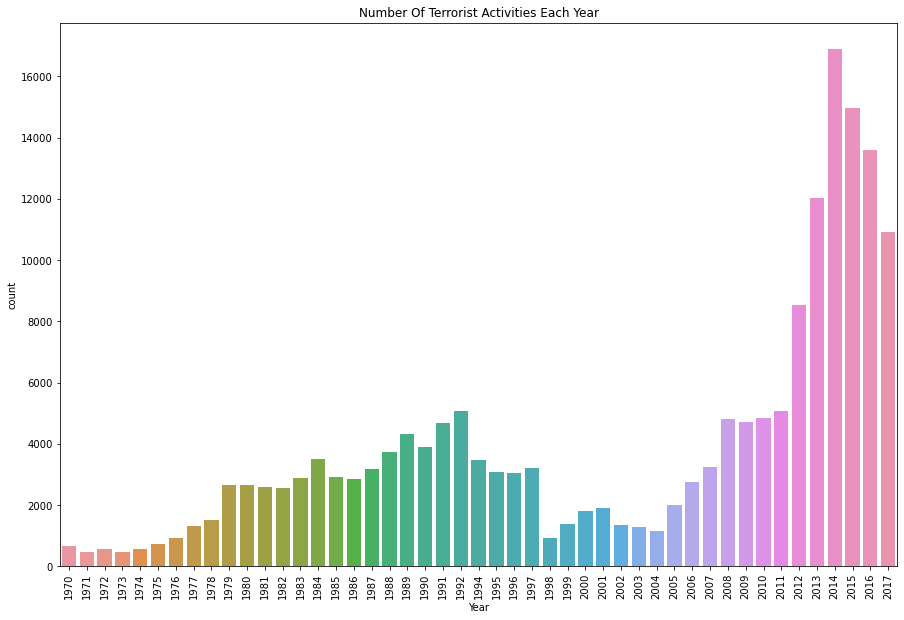

In [15]:
plt.figure(figsize=(15,10))
sns.countplot(x="Year", data=df)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

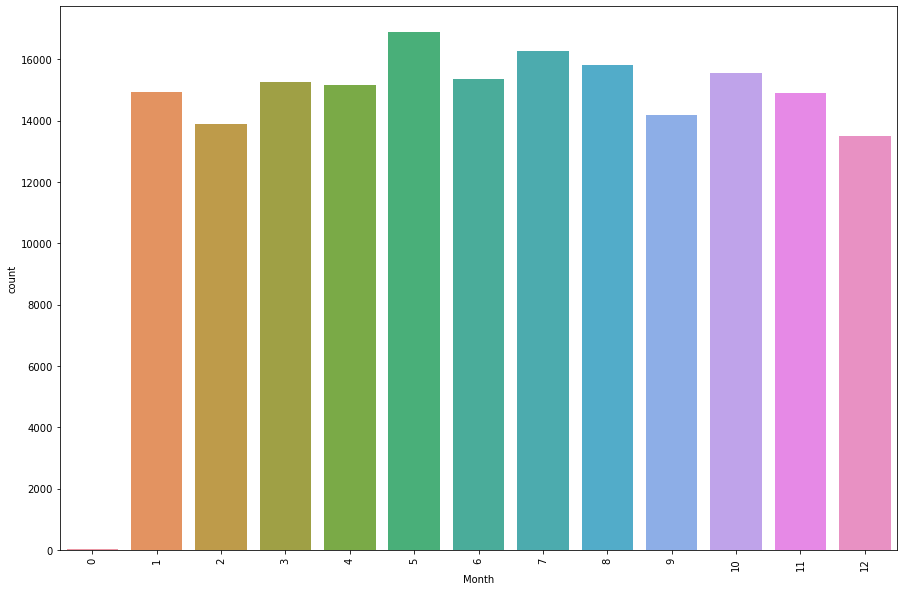

In [17]:
df['Month'].value_counts()
plt.figure(figsize = (15, 10))
sns.countplot(x='Month', data = df)
plt.xticks(rotation=90)
plt.show()

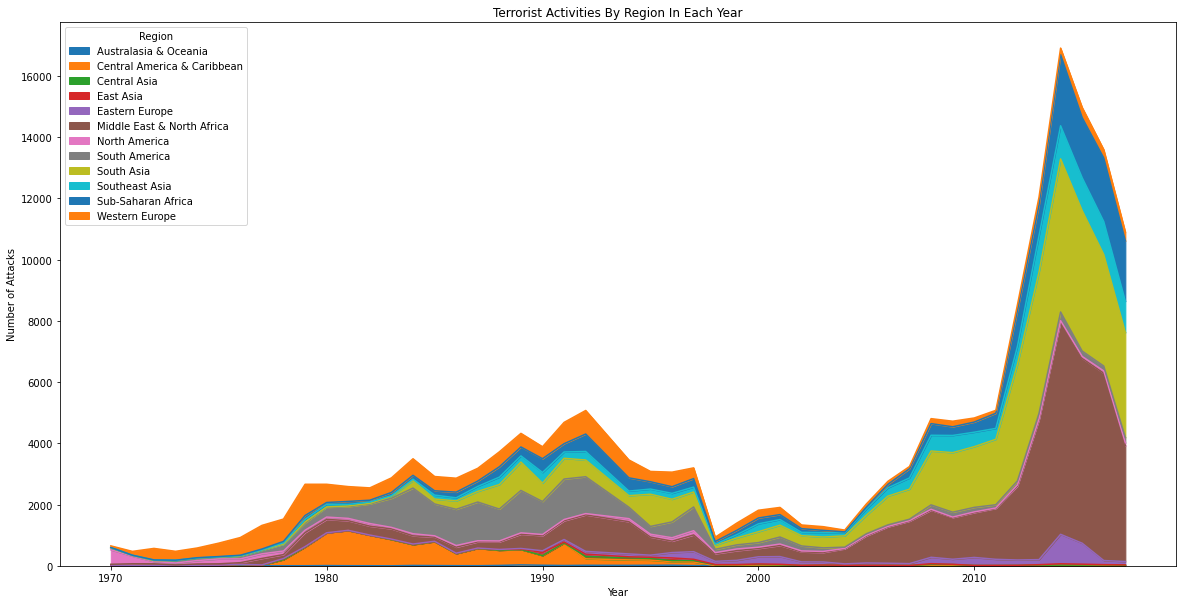

In [18]:
pd.crosstab(df.Year, df.Region).plot(kind='area',figsize=(20,10))
plt.title('Terrorist Activities By Region In Each Year')
plt.ylabel('Number of Attacks')
plt.show()

# Insight

In [20]:
print("Country with the most attacks:",Terror_Final['Country'].value_counts().idxmax())
print("City with the most attacks:",Terror_Final['City'].value_counts().index[0]) 
print("Region with the most attacks:",Terror_Final['Region'].value_counts().idxmax())
print("Year with the most attacks:",Terror_Final['Year'].value_counts().idxmax())
print("Month with the most attacks:",Terror_Final['Month'].value_counts().idxmax())
print("Most Attack Types:",Terror_Final['Attack_type'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: South Asia
Year with the most attacks: 2011
Month with the most attacks: 7
Most Attack Types: Bombing/Explosion


# more affected countries

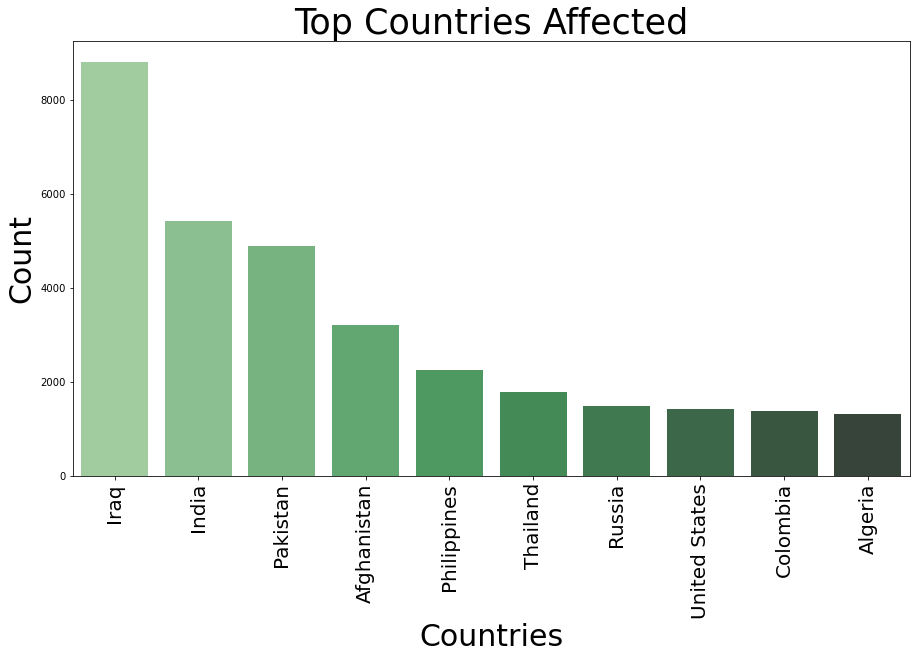

In [21]:
plt.subplots(figsize=(15,8))
sns.barplot(Terror_Final['Country'].value_counts()[:10].index,Terror_Final['Country'].value_counts()[:10].values,palette='Greens_d')
plt.title('Top Countries Affected' , fontsize = 35)
plt.xlabel('Countries' , fontsize = 30)
plt.ylabel('Count' , fontsize = 30)
plt.xticks(rotation= 90 , fontsize = 20)
plt.show()

In [22]:
idx=1
for i in Terror_Final['Country'].value_counts()[0:10].index:
    print(idx,".",i,"------>")
    print("                            ",Terror_Final['Country'].value_counts()[i],"attacks")
    print()
    idx+=1

1 . Iraq ------>
                             8811 attacks

2 . India ------>
                             5427 attacks

3 . Pakistan ------>
                             4900 attacks

4 . Afghanistan ------>
                             3206 attacks

5 . Philippines ------>
                             2253 attacks

6 . Thailand ------>
                             1782 attacks

7 . Russia ------>
                             1488 attacks

8 . United States ------>
                             1426 attacks

9 . Colombia ------>
                             1389 attacks

10 . Algeria ------>
                             1328 attacks



# Terrorist activity each year

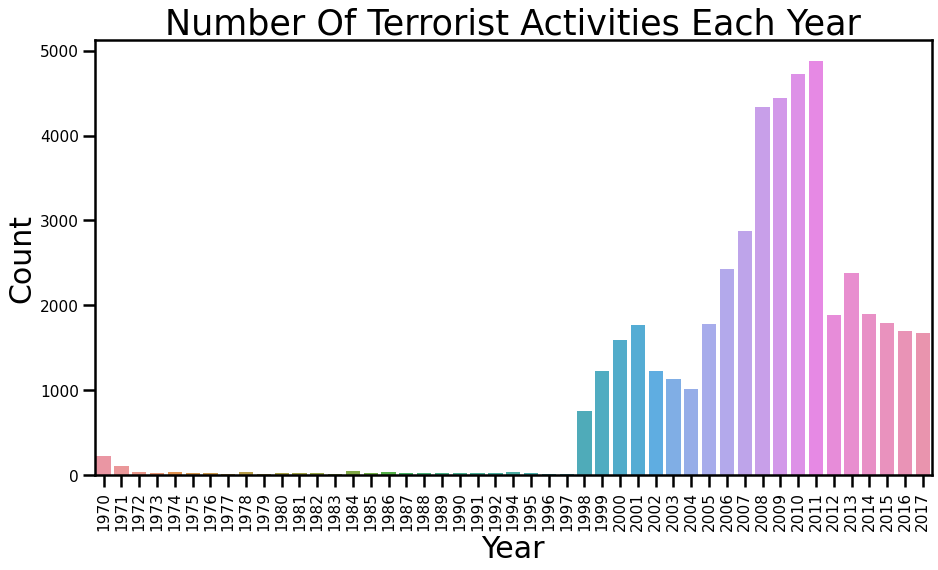

In [23]:
plt.figure(figsize=(15,8))
sns.set_context("poster" , font_scale = 0.7)
sns.countplot(Terror_Final["Year"])
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year' ,fontsize = 35 )
plt.xlabel('Year' , fontsize = 30)
plt.ylabel('Count' , fontsize = 30)
plt.show()

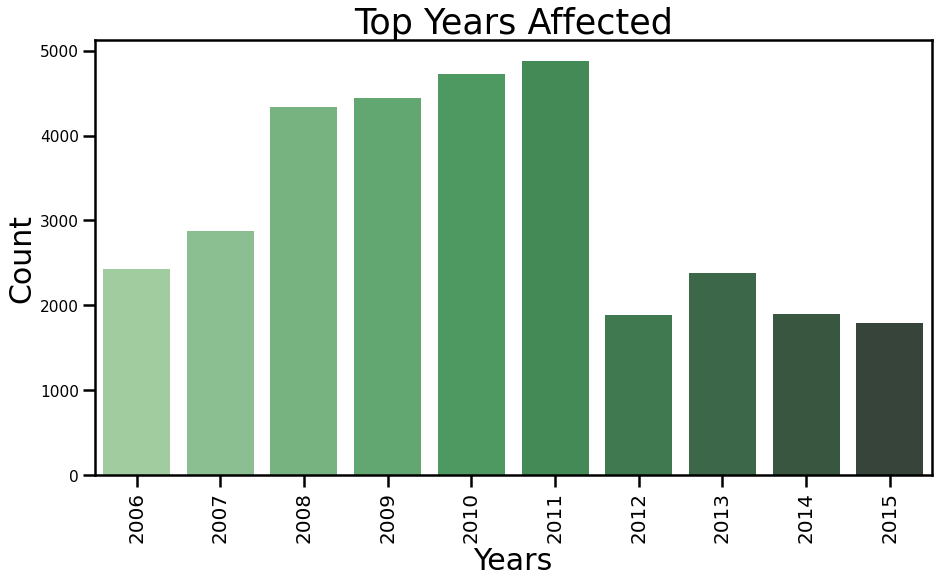

In [24]:
plt.subplots(figsize=(15,8))
sns.barplot(Terror_Final['Year'].value_counts()[:10].index,
            Terror_Final['Year'].value_counts()[:10].values,
            palette='Greens_d')
plt.title('Top Years Affected' , fontsize = 35)
plt.xlabel('Years' , fontsize = 30)
plt.ylabel('Count' , fontsize = 30)
plt.xticks(rotation= 90 , fontsize = 20)
plt.show()

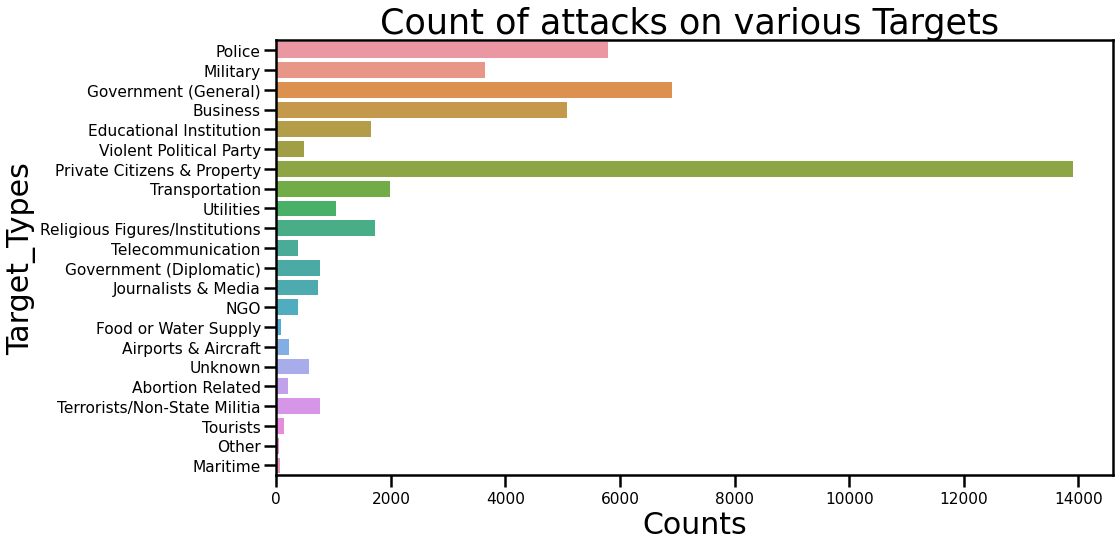

In [25]:
plt.figure(figsize=(15,8))
sns.countplot(y=Terror_Final['Target_type'])
plt.title('Count of attacks on various Targets ' , fontsize = 35)
plt.xlabel('Counts' , fontsize = 30)
plt.ylabel('Target_Types' , fontsize = 30)
plt.show()

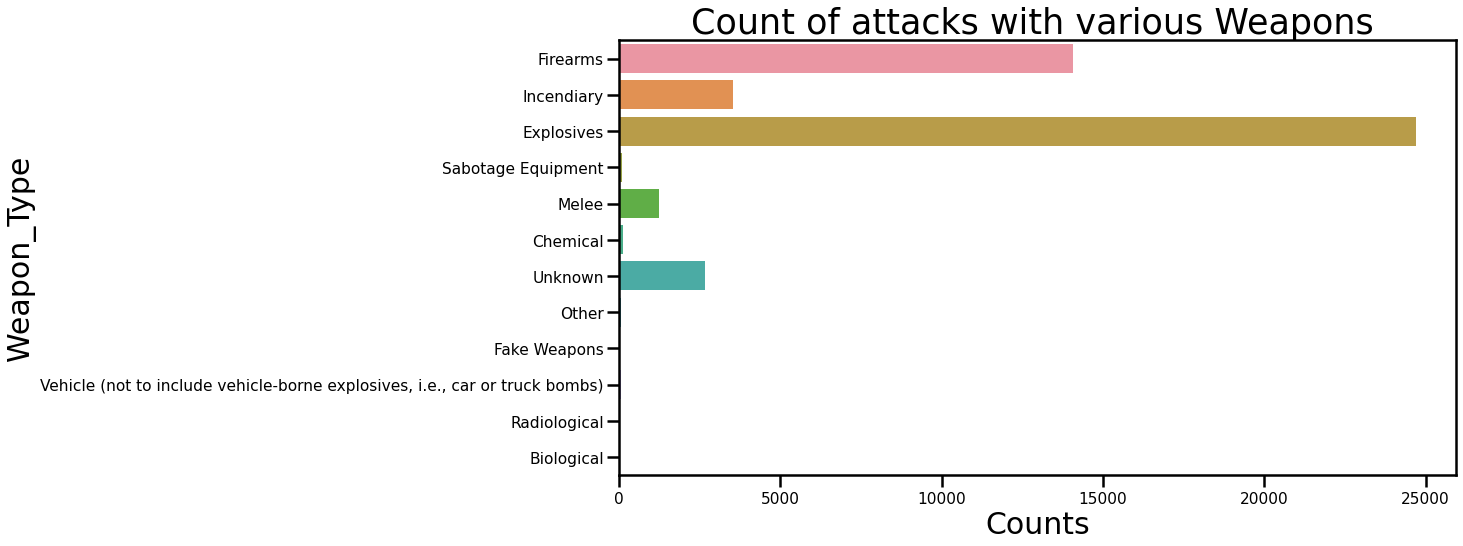

In [26]:
plt.figure(figsize=(15,8))
sns.countplot(y=Terror_Final['Weapon_type'])
plt.title('Count of attacks with various Weapons ' , fontsize = 35)
plt.xlabel('Counts' , fontsize = 30)
plt.ylabel('Weapon_Type', fontsize = 30 )
plt.show()


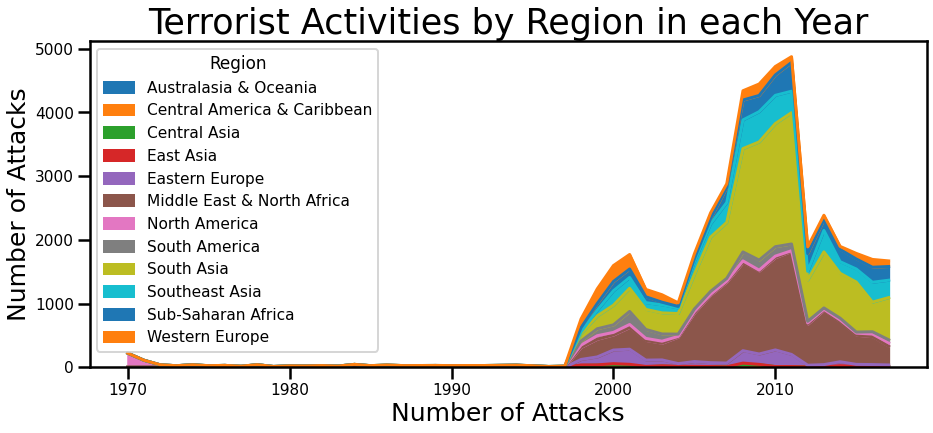

In [28]:
pd.crosstab(Terror_Final.Year, Terror_Final.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year', size = 35)
plt.xlabel('Number of Attacks' , size = 25)
plt.ylabel('Number of Attacks', size = 25)
plt.show()